In [8]:
-

SyntaxError: invalid syntax (<ipython-input-8-0a1f21a34173>, line 1)

37.8946134689
33.2518551424
31.4239237769
30.4013617636
29.6995943812
29.1964811323
28.848218214
28.6083708861
28.4403078183
28.3183151188
28.2249142761
28.1489355864
28.0838345078
28.0260820263
27.9738743899
27.9262801074
27.8827583116
27.8429213981
27.8064337498
27.7729769021


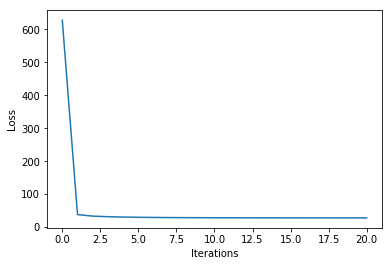

[[  4.4250826    2.54533358   3.24293674 ...,   6.19697647   6.01855987
    6.10780847]
 [  3.69231386   4.04818176   2.73739064 ...,   8.73052459   6.61143865
    9.19502853]
 [  4.02865052   4.43062968   2.28556363 ...,   8.13754077   7.37408121
    7.35450991]
 ..., 
 [  4.85545246   3.90186262   6.52077129 ...,  10.81266608  11.28215217
   10.71308549]
 [  4.56938985   3.30510581   4.08817488 ...,   8.62365188   7.90072447
    8.57376384]
 [  3.25948812   4.63413268   1.79418712 ...,   5.45038481   3.85857819
    4.48318455]]


In [7]:
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from numpy import random
import warnings
warnings.filterwarnings("ignore")
def load(path):
    with open(path) as f0:
        user = []
        item = []
        rate = []
        for i in f0:        
             temp = i.split()
             user.append(temp[0])
             item.append(temp[1])
             rate.append(temp[2])
    return np.array(user).astype(float),np.array(item).astype(float),np.array(rate).astype(float)

def rate_csc_matrix():
    path_base = "./u1.base"
    path_test = "./u1.test"
    user_base,item_base,rate_base = load(path_base)
    user_test,item_test,rate_test = load(path_test)
    rate_matrix_base = csc_matrix((rate_base, (user_base, item_base)), shape=(944, 1683)).toarray()
    rate_matrix_test = csc_matrix((rate_test, (user_test, item_test)), shape=(944, 1683)).toarray()
    u1_base = np.delete(rate_matrix_base,0,axis=0)
    u1_base = np.delete(u1_base,0,axis=1)
    u1_test = np.delete(rate_matrix_test,0,axis=0)
    u1_test = np.delete(u1_test,0,axis=1)
    return u1_base,u1_test

def loss(r, p, q, beta):
    L0 = np.sum((r - np.dot(p, q))**2)
    L1 = beta * (np.sum(p**2) + np.sum(q**2))
    loss_ = (L0 + L1) / (r.shape[0] * r.shape[1])
    return loss_

def grad(p, q, K, m, n, error, alpha, beta):   
    for k in range(K):
        p[m, k] = p[m, k] + (2 * error * q[k, n] - beta * p[m, k]) * alpha
        q[k, n] = q[k, n] + (2 * error * p[m, k] - beta * q[k, n]) * alpha
    return p,q

def Recommend(base, test, K):
    alpha = 0.005
    beta = 0.02
    iteration = 20
    p = np.random.rand(base.shape[0], K)
    q = np.random.rand(K, base.shape[1])
    loss_record = []
    loss_ = loss(test, p, q, beta)
    loss_record.append(loss_)
    for i in range(iteration):
        for m in range (base.shape[0]):
            for n in range (base.shape[1]):
                if base[m][n] > 0:
                    error = base[m][n] - np.dot(p[m,:], q[:,n])
                    p,q = grad(p, q, K, m, n, error, alpha, beta);
        loss_ = loss(test, p, q, beta)
        loss_record.append(loss_)
        print(loss_)
    return p, q, loss_record

if __name__ == "__main__":
    u1_base,u1_test = rate_csc_matrix();
    K = 100 
    p, q, loss_record = Recommend(u1_base, u1_test, K)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(loss_record)
    plt.show()
    r=np.dot(p,q)
    print(r)